In [91]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
!head 'twitter_data.txt'

In [151]:
tweets_data_path = 'twitter_data_2.txt'

tweets_data = []
location_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [152]:
len(tweets_data)

13000

In [150]:
tweets_data[0]

{'created_at': 'Sun May 26 04:15:44 +0000 2019',
 'id': 1132500539709648897,
 'id_str': '1132500539709648897',
 'text': '2 days into keto , and i already feel like a skinny legend',
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 783215322,
  'id_str': '783215322',
  'name': 'syd',
  'screen_name': 'poplin55',
  'location': 'Gillette, WY',
  'url': 'https://m.youtube.com/channel/UCejhp7hzwYeHoLGbXO4r5RQ',
  'description': 'in love with life dude',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 966,
  'friends_count': 3758,
  'listed_count': 0,
  'favourites_count': 2813,
  'statuses_count': 2951,
  'created_at': 'Sun Aug 26 21:22:19 +0000 2012',
  'utc_offset': None,
  'time_zone': None,
  'ge

In [59]:
#make into PD
pd_tweets = pd.DataFrame(tweets_data)

In [20]:
pd_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 36 columns):
contributors                 0 non-null object
coordinates                  154 non-null object
created_at                   13000 non-null object
display_text_range           3756 non-null object
entities                     13000 non-null object
extended_entities            1096 non-null object
extended_tweet               3974 non-null object
favorite_count               13000 non-null int64
favorited                    13000 non-null bool
filter_level                 13000 non-null object
geo                          154 non-null object
id                           13000 non-null int64
id_str                       13000 non-null object
in_reply_to_screen_name      1783 non-null object
in_reply_to_status_id        1697 non-null float64
in_reply_to_status_id_str    1697 non-null object
in_reply_to_user_id          1783 non-null float64
in_reply_to_user_id_str      1783 non-nul

In [247]:
pd_tweets["retweet_count"]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
12970    0
12971    0
12972    0
12973    0
12974    0
12975    0
12976    0
12977    0
12978    0
12979    0
12980    0
12981    0
12982    0
12983    0
12984    0
12985    0
12986    0
12987    0
12988    0
12989    0
12990    0
12991    0
12992    0
12993    0
12994    0
12995    0
12996    0
12997    0
12998    0
12999    0
Name: retweet_count, Length: 13000, dtype: int64

In [146]:
pd_tweets.describe()
#this is showing recent tweets so they will not have had the chance
#to be rewteeted

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quote_count,quoted_status_id,reply_count,retweet_count
count,13000.0,1.300000e+04,1.697000e+03,1.783000e+03,13000.0,8.180000e+02,13000.0,13000.0
mean,0.0,1.132975e+18,1.131981e+18,3.046317e+17,0.0,1.126624e+18,0.0,0.0
std,0.0,1.393661e+14,1.590267e+16,4.454267e+17,0.0,2.727784e+16,0.0,0.0
min,0.0,1.132719e+18,5.463563e+17,1.395300e+04,0.0,8.439385e+17,0.0,0.0
25%,0.0,1.132846e+18,1.132754e+18,1.767328e+08,0.0,1.131394e+18,0.0,0.0
50%,0.0,1.133005e+18,1.132892e+18,1.704385e+09,0.0,1.132717e+18,0.0,0.0
75%,0.0,1.133085e+18,1.133067e+18,8.257763e+17,0.0,1.132944e+18,0.0,0.0
max,0.0,1.133212e+18,1.133210e+18,1.133007e+18,0.0,1.133210e+18,0.0,0.0


In [170]:
# Nothing re-tweeted?
pd_tweets.sort_values("retweet_count", axis=0,ascending=False)

In [123]:
#look at data within USER
pd_users = pd_tweets["user"]
np_users = np.array(pd_users)
pd_users_2 = list(np_users)
pd_users_3 = pd.DataFrame(pd_users_2)
pd_users_3

,contributors_enabled,created_at,default_profile,default_profile_image,description,favourites_count,follow_request_sent,followers_count,following,friends_count,...,profile_text_color,profile_use_background_image,protected,screen_name,statuses_count,time_zone,translator_type,url,utc_offset,verified
0,False,Sat Mar 26 08:35:36 +0000 2011,False,False,"Artist, Impossiblist & Improbableteer. https:/...",31816,None,1721,None,3114,...,333333,True,False,avianink,7856,None,none,None,None,False
1,False,Thu Mar 15 11:49:30 +0000 2012,False,False,Psicóloga experta en duelo,10287,None,274,None,122,...,000000,False,False,slosantos,9792,None,none,http://blog.fundacionmlc.org,None,False
2,False,Fri Mar 14 14:14:58 +0000 2008,False,False,I'm useless without that first cup of coffee. ...,111,None,1813,None,1232,...,333333,False,False,FrancineClouden,23841,None,none,http://theorganisedcrafterbrain.com,None,False
3,False,Mon Jun 29 10:04:00 +0000 2009,False,False,"British, Ex Chairman, Finance Director, great ...",5811,None,357,None,678,...,333333,True,False,OldandFilthy,12504,None,none,None,None,False
4,False,Sun Aug 13 14:44:33 +0000 2017,False,False,"♥ @Despair_for_ [드림주의] ♥ 잡덕계((원작)단간 동인(드림언급),...",15769,None,81,None,177,...,000000,False,False,KB_love_IRW,33461,None,none,http://posty.pe/1ya7m1,None,False
5,False,Mon Oct 17 20:18:25 +0000 2016,True,False,None,80,None,10,None,26,...,333333,True,False,ElbaDeana,1193,None,none,https://xplabs.net,None,False
6,False,Sun Feb 01 06:56:17 +0000 2009,False,False,Mindset-centered fat loss. Helping people get...,2340,None,1075,None,1120,...,FAFAFA,True,False,lean_minded,4684,None,none,http://www.leanminded.com,None,False
7,False,Mon Jun 06 18:15:27 +0000 2011,False,False,Ephesians 4:1✨ | @livingetn Storyteller for @6...,35386,None,1596,None,1282,...,E685E6,True,False,chelseeeaolivia,47664,None,none,http://www.chelseahaynes-ondemand.com,None,False
8,False,Wed Jun 13 22:48:12 +0000 2012,False,False,21 | Capricornio,6499,None,341,None,414,...,333333,True,False,Minelyrubi,21612,None,none,None,None,False
9,False,Wed Apr 10 18:19:28 +0000 2019,True,False,😏,33,None,6,None,53,...,333333,True,False,harnesachi,425,None,none,https://bit.ly/2GgtyG6,None,False


In [161]:
pd_users_3['location']

0                            Vancouver
1                                 None
2                               France
3                    Lost in France...
4               ↓ TRPG프로필, 시날깐목록은 이쪽에→
5                                 None
6                            Vancouver
7                     htx | zou | knox
8                                 None
9                                 None
10                                None
11       Global -Recruit & Train Staff
12                       Mumbai, India
13                         Locks Heath
14                    Connecticut, USA
15                   Région parisienne
16                                None
17                 mexico D.F Coyoacan
18                                SATX
19                               Earth
20                       United States
21                 Northern California
22                    Toronto, Ontario
23                                None
24                      Iquique, Chile
25                     Ca

In [155]:
# Look at data within place, no place data??? 
# Do I need to pull some special parameter
pd_place = pd_tweets["place"]
pd_place.head()
# np_place = np.array(pd_place)
# pd_place_2 = list(np_place)
# pd_place_3 = pd.DataFrame(pd_place_2)
# pd_place_3

0    None
1    None
2    None
3    None
4    None
Name: place, dtype: object

In [63]:
#explore country
# tweets_by_place = pd_tweets['location'].value_counts().reset_index()
# tweets_by_place
# tweets_by_place = tweets_by_place[tweets_by_place['place']>59]

In [135]:
#explore countries
tweets_by_lang = pd_tweets['lang'].value_counts().reset_index()
tweets_by_lang_top5 = tweets_by_lang[tweets_by_lang['lang']>59]

Text(0.5, 1.0, 'Top 5 Languages')

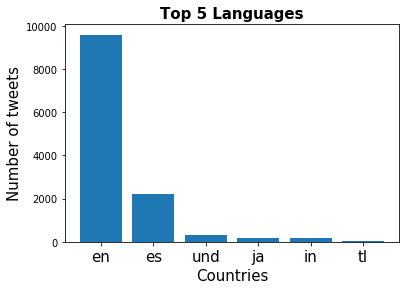

In [136]:
fig, ax = plt.subplots()
ax.bar(tweets_by_lang_top5['index'], tweets_by_lang_top5['lang'])
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 Languages', fontsize=15, fontweight='bold')

In [213]:
#only include data in english, now 9,593 entries from 13,000
pd_tweets_en = pd_tweets[pd_tweets['lang'] == 'en']

In [214]:
import re

In [215]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [225]:
pd_tweets_en['keto'] = pd_tweets_en['text'].apply(lambda text: word_in_text('keto', text))
pd_tweets_en['whole30'] = pd_tweets_en['text'].apply(lambda text: word_in_text('whole30', text))
pd_tweets_en['glutenfree'] = pd_tweets_en['text'].apply(lambda text: word_in_text('glutenfree', text))
pd_tweets_en['mediterraneandiet'] = pd_tweets_en['text'].apply(lambda text: word_in_text('mediterraneandiet', text))
pd_tweets_en['lowfat'] = pd_tweets_en['text'].apply(lambda text: word_in_text('lowfat', text))
pd_tweets_en['paleo'] = pd_tweets_en['text'].apply(lambda text: word_in_text('paleo', text))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [218]:
keto_cnt = pd_tweets_en['keto'].value_counts()[True]

In [219]:
whole30_cnt = pd_tweets_en['whole30'].value_counts()[True]

In [220]:
glutenfree_cnt = pd_tweets_en['glutenfree'].value_counts()[True]

In [221]:
med_cnt = pd_tweets_en['mediterraneandiet'].value_counts()[True]

In [222]:
lowfat_cnt = pd_tweets_en['lowfat'].value_counts()[True]

In [223]:
paleo_cnt = pd_tweets_en['paleo'].value_counts()[True]

Text(0, 0.5, 'Number of tweets')

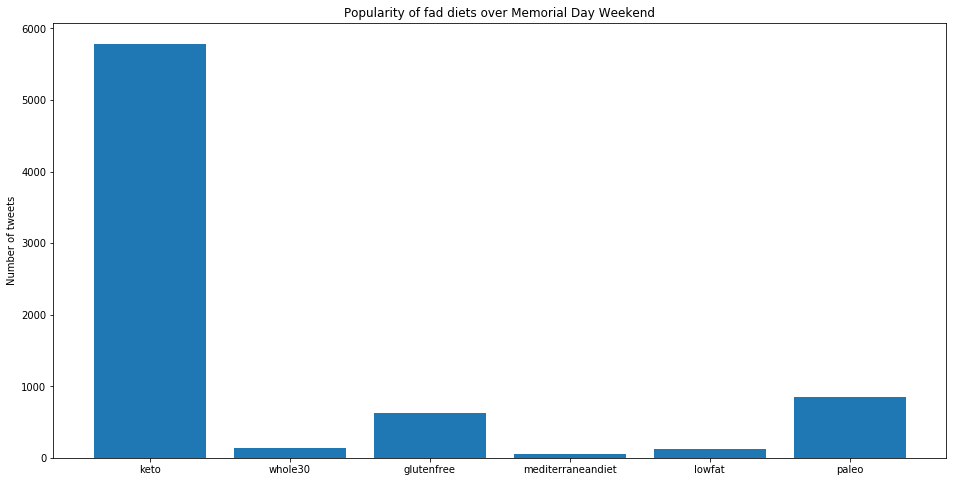

In [239]:
diets = ['keto', 'whole30', 'glutenfree', 'mediterraneandiet', 'lowfat', 'paleo']
number = [keto_cnt, whole30_cnt, glutenfree_cnt, med_cnt, lowfat_cnt, paleo_cnt]

x_pos = list(range(len(diets)))
fig, ax = plt.subplots(figsize = (16,8))
plt.bar(diets, number)
ax.set_xticklabels(diets)
ax.set_title('Popularity of fad diets over Memorial Day Weekend')
ax.set_ylabel('Number of tweets')

In [232]:
pd_tweets_en['lost'] = pd_tweets_en['text'].apply(lambda text: word_in_text('lost', text))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [233]:
pd_tweets_en[pd_tweets_en['lost'] == True]['keto'].value_counts()[True]

170

In [236]:
pd_tweets_en[pd_tweets_en['lost'] == True]['whole30'].value_counts()[True]

1

In [238]:
pd_tweets_en[pd_tweets_en['lost'] == True]['paleo'].value_counts()[True]

7

In [229]:
# Create pd with just text for english tweets and examine
pd_text = pd_tweets_en["text"].reset_index()
pd.set_option('display.max_colwidth', 1)
pd_text

,index,text
0,0,RT @TuSoonShakur: GNC CLERK: you on the paleo diet?\nALBINO: not funny
1,2,New Edition of My West Indian Diaspora. https://t.co/XM6pmekz4N Stories via @KellyKatharin @Yana_Yz @Chookooloonks #keto #travelblog
2,3,"@Cornishview I lost a 42lbs last year on keto, and 6"" off my waist\nMy bloods went entirely back to normal, my blood… https://t.co/v7VYjbFK8C"
3,4,"RT @AncientIrismon: After a pun on this week's With the Will podcast, I made Joe Keto bread! https://t.co/Xhb9Oj48S7"
4,6,@superbirdman1 @MikhailaAleksis @kevinnbass @ProfTimNoakes Bass isnt wrong. He's objective.. which is way more than… https://t.co/WnT41Lx0ug
5,7,"Might be late to the party... but @KashiFoods has these superfood beet, berry and quinoa waffles... AHMAZING.… https://t.co/pIcQzY6LOP"
6,9,RT @PrettyDressGirl: Every time I visit an @nationaltrust property I go hungry. Please do better at providing #glutenfree options.
7,10,SBD • space between diet \n\ncertified organic \nno wheat products \nno soy products \nno peanut products \nno coffee bea… https://t.co/bK1LvG4Ypr
8,12,Sunday Keto Dinner...\nCumin and Cinnamon Spiced Cauliflower rice with Chicken Curry and Full fat Yoghurt..\nSo filli… https://t.co/Bk8CXJDrs3
9,13,@bistoblue @City_Chief @Footy_Headlines Won’t fit us fat fuckers . Keto anyone ?


In [246]:
#read tweets with "lost" in it for weight loss - a proxy of how successful it is
pd_tweets_en[pd_tweets_en['lost'] == True].text

3        @Cornishview I lost a 42lbs last year on keto, and 6" off my waist\nMy bloods went entirely back to normal, my blood… https://t.co/v7VYjbFK8C      
44       @Alshline @GaleTheRoo I have just started keto as well. Lost 6 pounds in the first week. On week 2 now                                             
82       @LW_GMM_SPN I ate keto and I lost a bunch of weight- it’s because I was eating less calories! When I upped how much… https://t.co/QLQjGbWBvc       
83       Been on Keto for a week and I lost two pounds already lol                                                                                          
176      @libertytarian @CrossFit Wish your protein bar was keto friendly, I know your Bone Broth is though. I have lost 15L… https://t.co/y0y6zc7vxf       
230      The real measure of our wealth is how much we'd be worth if we lost all our money. -Jowett #iphone6recallbattery… https://t.co/iVuKskA79H          
291      @maydaymindy9 I’ve never done keto, but I lost 16